In [55]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

In [58]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [60]:
def createdataframe(dir):
    image_paths = []
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [61]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [62]:
train.head()

,image,label
0,images/train\angry\0.jpg,angry
1,images/train\angry\1.jpg,angry
2,images/train\angry\10.jpg,angry
3,images/train\angry\10002.jpg,angry
4,images/train\angry\10016.jpg,angry


In [63]:
label_counts = train['label'].value_counts()
print(label_counts)

happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: label, dtype: int64


In [64]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd

# Define the target count for each label
target_count = 4000

# Calculate the number of samples to drop from each majority class
label_counts = train['label'].value_counts()
samples_to_drop = {}
for label, count in label_counts.items():
    if count > target_count:
        samples_to_drop[label] = count - target_count

# Drop samples from majority classes
for label, count in samples_to_drop.items():
    drop_indices = train[train['label'] == label].sample(count, random_state=42).index
    train = train.drop(drop_indices)

# Verify the counts after dropping samples
label_counts_after_drop = train['label'].value_counts()
print(label_counts_after_drop)

fear        4000
happy       4000
neutral     4000
sad         4000
angry       3993
surprise    3205
disgust      436
Name: label, dtype: int64


In [66]:
train.head()

,image,label
0,images/train\angry\0.jpg,angry
1,images/train\angry\1.jpg,angry
2,images/train\angry\10.jpg,angry
3,images/train\angry\10002.jpg,angry
4,images/train\angry\10016.jpg,angry


In [67]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [68]:
import pandas as pd

# Define the target count for each label
target_count = 1000

# Calculate the number of samples to drop from each majority class
label_counts = test['label'].value_counts()
samples_to_drop = {}
for label, count in label_counts.items():
    if count > target_count:
        samples_to_drop[label] = count - target_count

# Drop samples from majority classes
for label, count in samples_to_drop.items():
    drop_indices = test[test['label'] == label].sample(count, random_state=42).index
    test = test.drop(drop_indices)

# Verify the counts after dropping samples
label_counts_after_drop = test['label'].value_counts()
print(label_counts_after_drop)

fear        1000
happy       1000
neutral     1000
sad         1000
angry        960
surprise     797
disgust      111
Name: label, dtype: int64


In [69]:
test.head()

,image,label
0,images/test\angry\10052.jpg,angry
1,images/test\angry\10065.jpg,angry
2,images/test\angry\10079.jpg,angry
3,images/test\angry\10095.jpg,angry
4,images/test\angry\10121.jpg,angry


In [70]:
from tqdm.notebook import tqdm

In [71]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img= load_img(image, grayscale = True)
        img= np.array(img)
        features.append(img)
    features= np.array(features)
    print(len(features))
    features= features.reshape(len(features),48,48,1)
    return features

In [72]:
train_features = extract_features(train['image'])

  0%|          | 0/23634 [00:00<?, ?it/s]

C:\Users\swast\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


23634


In [74]:
test_features = extract_features(test['image'])

  0%|          | 0/5868 [00:00<?, ?it/s]

5868


In [75]:
x_train = train_features/255.0
x_test = test_features/255.0

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [78]:
print(train.head())

                          image  label
0      images/train\angry\0.jpg  angry
1      images/train\angry\1.jpg  angry
2     images/train\angry\10.jpg  angry
3  images/train\angry\10002.jpg  angry
4  images/train\angry\10016.jpg  angry


In [79]:
print(test.head())

                         image  label
0  images/test\angry\10052.jpg  angry
1  images/test\angry\10065.jpg  angry
2  images/test\angry\10079.jpg  angry
3  images/test\angry\10095.jpg  angry
4  images/test\angry\10121.jpg  angry


In [80]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [81]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [51]:
model = Sequential()

model.add (Conv2D(128, kernel_size=(3,3), activation= 'relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
                  
model.add(Conv2D(512, kernel_size=(3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
                 
model.add(Flatten())
                 
# fully connected Layers
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

In [108]:
print(model.input_shape)
model.summary()

(None, 48, 48, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 23, 23, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 23, 23, 128)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 23, 23, 256)       295168    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 11, 11, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 

In [103]:
"model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = 'accuracy')

SyntaxError: unterminated string literal (detected at line 1) (1296916637.py, line 1)

In [104]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.00001)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
model.fit(x= x_train, y=y_train, batch_size = 128, epochs=3, validation_data = (x_test,y_test))

Epoch 1/3
17/17 [==============================] - 41s 2s/step - loss: 8.3979 - accuracy: 0.1386 - val_loss: 1.9466 - val_accuracy: 0.1429
Epoch 2/3
17/17 [==============================] - 41s 2s/step - loss: 1.9476 - accuracy: 0.1329 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 3/3
17/17 [==============================] - 35s 2s/step - loss: 1.9473 - accuracy: 0.1376 - val_loss: 1.9460 - val_accuracy: 0.1429


In [82]:
from keras.optimizers import Adam


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

In [84]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [85]:
model.fit(x= x_train, y=y_train, batch_size = 128, epochs=50, validation_data = (x_test,y_test), callbacks=callbacks_list)

Epoch 1/50
185/185 [==============================] - ETA: 0s - loss: 1.8969 - accuracy: 0.2539WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 583s 3s/step - loss: 1.8969 - accuracy: 0.2539 - val_loss: 2.0448 - val_accuracy: 0.1704 - lr: 0.0010
Epoch 2/50
185/185 [==============================] - ETA: 0s - loss: 1.5617 - accuracy: 0.3836WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 636s 3s/step - loss: 1.5617 - accuracy: 0.3836 - val_loss: 1.8925 - val_accuracy: 0.2633 - lr: 0.0010
Epoch 3/50
185/185 [==============================] - ETA: 0s - loss: 1.3839 - accuracy: 0.4619WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 724s 4s/step - loss: 1.3839 - accuracy: 0.4619 - val_loss: 1.5155 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 4/50
185/185 [==============================] - ETA: 0s - loss: 1.2848 - accuracy: 0.5033WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 714s 4s/step - loss: 1.2848 - accuracy: 0.5033 - val_loss: 1.2782 - val_accuracy: 0.5032 - lr: 0.0010
Epoch 5/50
185/185 [==============================] - ETA: 0s - loss: 1.2070 - accuracy: 0.5386WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 659s 4s/step - loss: 1.2070 - accuracy: 0.5386 - val_loss: 1.2931 - val_accuracy: 0.5089 - lr: 0.0010
Epoch 6/50
185/185 [==============================] - ETA: 0s - loss: 1.1474 - accuracy: 0.5596WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 592s 3s/step - loss: 1.1474 - accuracy: 0.5596 - val_loss: 1.2292 - val_accuracy: 0.5235 - lr: 0.0010
Epoch 7/50
185/185 [==============================] - ETA: 0s - loss: 1.1057 - accuracy: 0.5762WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 547s 3s/step - loss: 1.1057 - accuracy: 0.5762 - val_loss: 1.1969 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 8/50
185/185 [==============================] - ETA: 0s - loss: 1.0543 - accuracy: 0.5988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 652s 4s/step - loss: 1.0543 - accuracy: 0.5988 - val_loss: 1.3100 - val_accuracy: 0.4993 - lr: 0.0010
Epoch 9/50
185/185 [==============================] - ETA: 0s - loss: 1.0037 - accuracy: 0.6208WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 651s 4s/step - loss: 1.0037 - accuracy: 0.6208 - val_loss: 1.1286 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 10/50
185/185 [==============================] - ETA: 0s - loss: 0.9559 - accuracy: 0.6359WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 648s 4s/step - loss: 0.9559 - accuracy: 0.6359 - val_loss: 1.1478 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 11/50
185/185 [==============================] - ETA: 0s - loss: 0.9152 - accuracy: 0.6525WARNING:tensorflow:Can save best model only with val_acc available, skipping.


185/185 [==============================] - 730s 4s/step - loss: 0.9152 - accuracy: 0.6525 - val_loss: 1.3349 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 12/50
185/185 [==============================] - ETA: 0s - loss: 0.8707 - accuracy: 0.6712Restoring model weights from the end of the best epoch: 9.



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
185/185 [==============================] - 748s 4s/step - loss: 0.8707 - accuracy: 0.6712 - val_loss: 1.3486 - val_accuracy: 0.5130 - lr: 0.0010
Epoch 12: early stopping


In [86]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\swast\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
from keras.models import model_from_json

In [88]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [89]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [90]:
def ef(image):
    img = load_img(image, grayscale=True, target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [91]:
image = 'images/train/angry/22.jpg'
print("Original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

Original image is of happy


C:\Users\swast\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 1s 782ms/step
model prediction is angry


In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of fear
1/1 [==============================] - 0s 46ms/step
model prediction is sad


C:\Users\swast\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


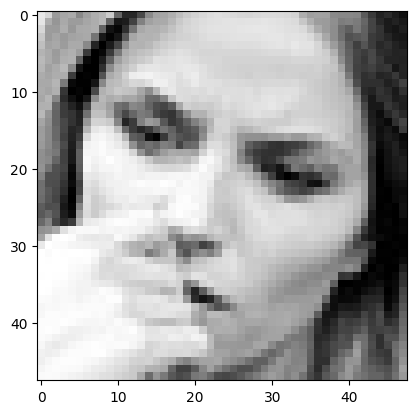

In [93]:
image = 'images/train/fear/2.jpg'
print("Original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of surprise
1/1 [==============================] - 0s 40ms/step
model prediction is surprise


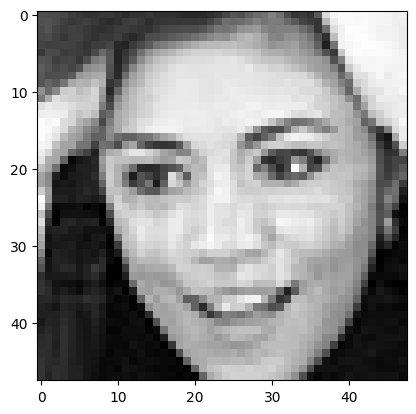

In [94]:
image = 'images/train/surprise/39.jpg'
print("Original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of surprise
1/1 [==============================] - 0s 43ms/step
model prediction is happy


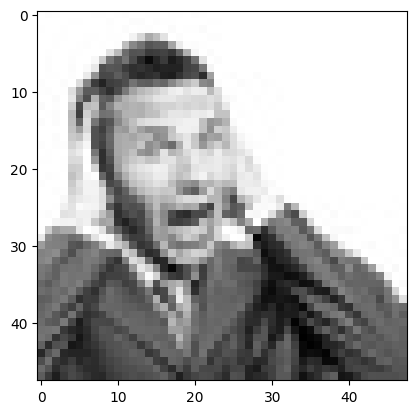

In [98]:
image = 'images/train/fear/17.jpg'
print("Original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()

Original image is of neutral
1/1 [==============================] - 0s 45ms/step
model prediction is neutral


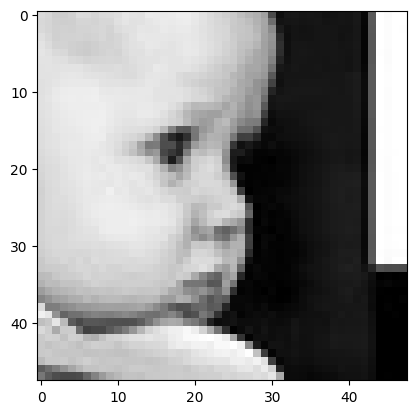

In [97]:
image = 'images/train/neutral/12.jpg'
print("Original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()

In [1]:
image = 'images/train/fear/17.jpg'
print("Original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()

Original image is of fear


NameError: name 'ef' is not defined

In [54]:
pip install --upgrade matplotlib



  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2d/d5/6227732ecab9165586966ccb54301e3164f61b470c954c4cf6940654fbe1/matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.1/7.7 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.2/7.7 MB 1.6 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.7 MB 1.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.7 MB 2.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/7.7 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.7 MB 2.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.7 MB 2.1 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.7 MB 1.8 MB/s eta 0:00:04
   --- --------------------------------